# Sistema de recomendação para jogadores de futebol
### Projeto IACH - MECD (2022/2023)

In [133]:
import os
import numpy as np
import pandas as pd

### Read Data

In [134]:
pasta = "data"

def readData(fileName):
    dir = os.path.join(pasta, fileName)
    dfs = pd.read_excel(dir)

    dFrame = pd.DataFrame(dfs)
    display(dFrame)

    return [dfs, dFrame]

[data, dataFrame] = readData("FIFA22playersdataset.xlsx")

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


### Data treatment

In [135]:
def dropColumns(data):
    data = data.drop(columns=["sofifa_id", "player_url", "club_team_id", "club_jersey_number", "nationality_id", "nation_team_id", "nation_jersey_number", "real_face", "club_logo_url", "club_flag_url", "nation_logo_url", "nation_flag_url"])
    #display(data)
    return data

def nullValues(data):
    data['club_name'] = data['club_name'].fillna('Free agent')
    data['league_name'] = data['league_name'].fillna('Free agent')
    data['club_loaned_from'] = data['club_loaned_from'].fillna('No loan')
    data = data.fillna(0)
    return data

def repeatedNames(data):
    newID = []
    '''
    size = data.shape[0]
    ids = np.arange(size)
    data = data.assign(NewID = ids)
    '''
    for idx in range(len(data)):
        newID.append(data['short_name'][idx] + ' ({})'.format(data['club_name'][idx]))
    
    player_ID = dict(zip(newID, np.arange(len(newID))))
    #display(data)
    return player_ID, newID

dataFrame = dropColumns(dataFrame)
dataFrame = nullValues(dataFrame)
#dataFrame.to_csv('new_data.csv', encoding='utf-8')
player_ID, newID = repeatedNames(dataFrame)



### Statiscal Analysis

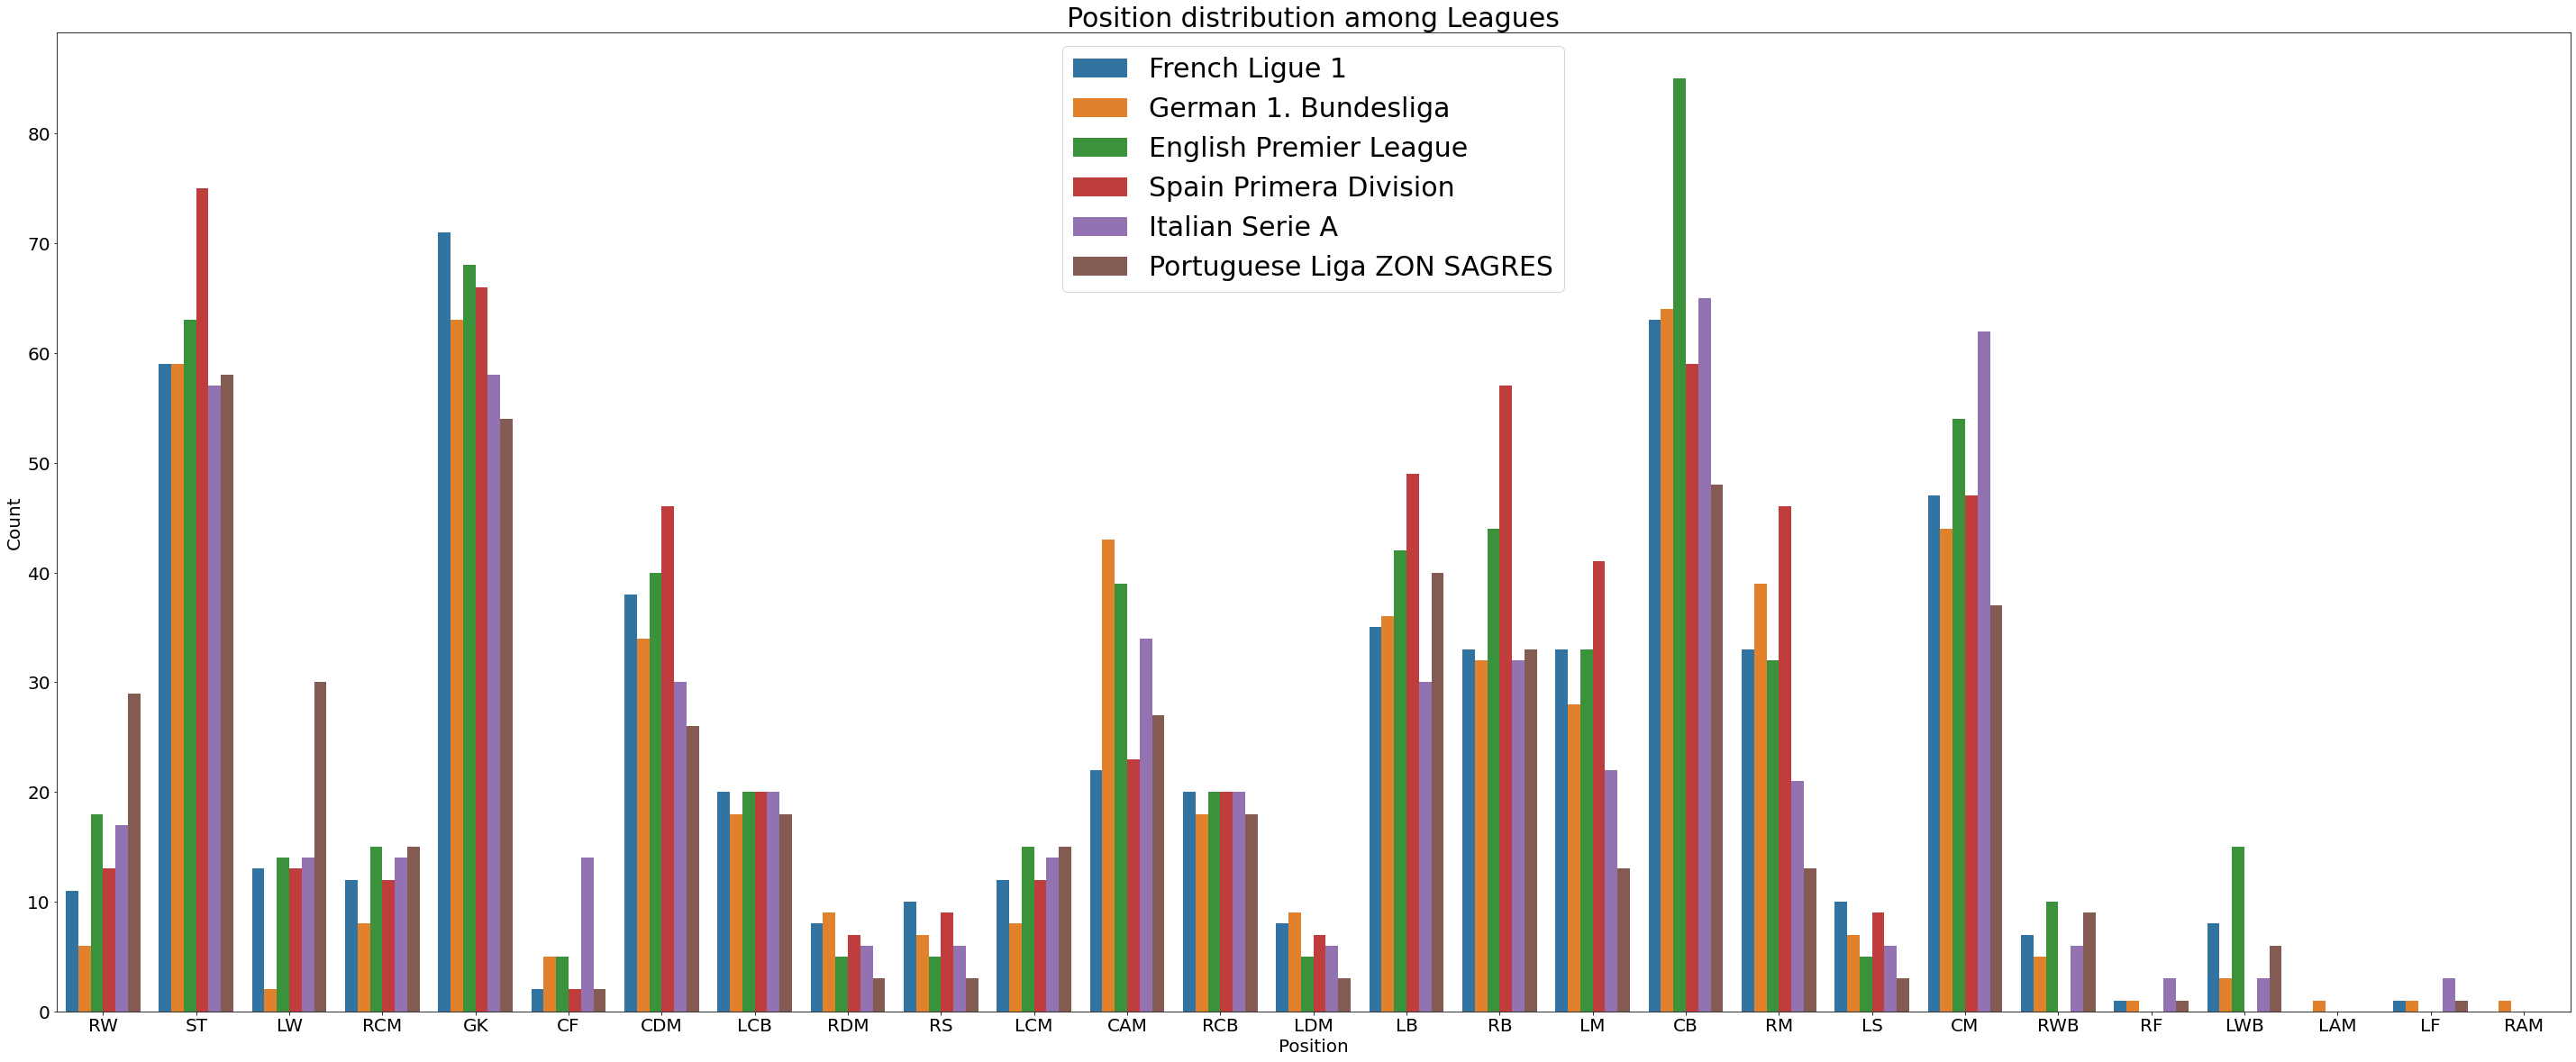

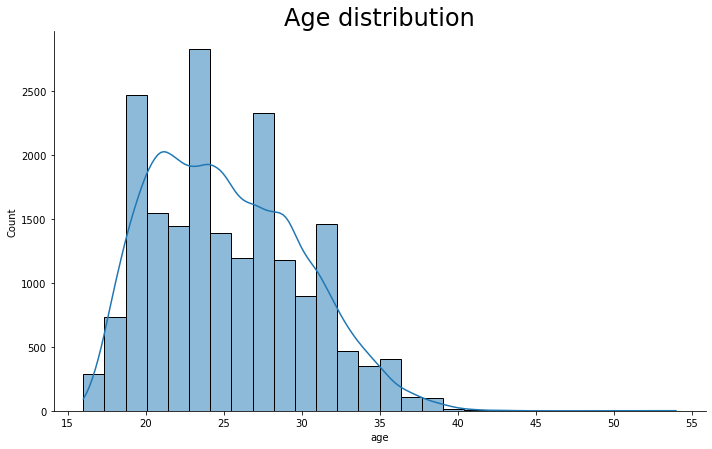

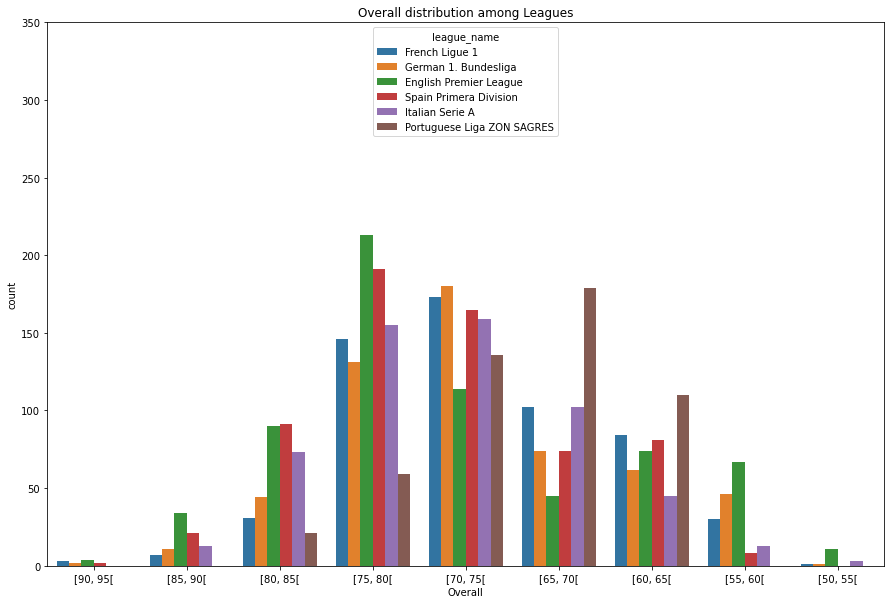

In [136]:
import seaborn as sns 
import matplotlib.pyplot as plt

def leagueDistribution(data):
    fig, _ = plt.subplots(figsize=(50,20))

    aux_data = pd.concat([data['league_name'], data['player_positions'].str.split(', ', expand=True)], axis = 1)

    data_aux = data.copy()
    data_aux.loc[data_aux['club_position'] == 'SUB', 'club_position'] = aux_data[0]
    data_aux.loc[data_aux['club_position'] == 'RES', 'club_position'] = aux_data[0]

    ax = sns.countplot(x='club_position', hue='league_name', data=data_aux)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='both', which='minor', labelsize=15)
    plt.legend(fontsize = 30)
    plt.xlabel('Position', fontsize = 20)
    plt.ylabel('Count', fontsize = 20)
    plt.title('Position distribution among Leagues', fontsize = 30)

def ageDistribution(data):
    sns.FacetGrid(data, height=6, aspect=10/6).map(sns.histplot, "age", bins = 28, kde = True)
    plt.title("Age distribution", size=24)
    plt.show()
    
    
def overallDistribution(data):
    data_aux = data.copy()
    data_aux.loc[data_aux['overall'].isin(np.arange(90, 95)), 'overall_interval'] = '[90, 95['
    data_aux.loc[data_aux['overall'].isin(np.arange(85, 90)), 'overall_interval'] = '[85, 90['
    data_aux.loc[data_aux['overall'].isin(np.arange(80, 85)), 'overall_interval'] = '[80, 85['
    data_aux.loc[data_aux['overall'].isin(np.arange(75, 80)), 'overall_interval'] = '[75, 80['
    data_aux.loc[data_aux['overall'].isin(np.arange(70, 75)), 'overall_interval'] = '[70, 75['
    data_aux.loc[data_aux['overall'].isin(np.arange(65, 70)), 'overall_interval'] = '[65, 70['
    data_aux.loc[data_aux['overall'].isin(np.arange(60, 65)), 'overall_interval'] = '[60, 65['
    data_aux.loc[data_aux['overall'].isin(np.arange(55, 60)), 'overall_interval'] = '[55, 60['
    data_aux.loc[data_aux['overall'].isin(np.arange(50, 55)), 'overall_interval'] = '[50, 55['
    

    fig, _ = plt.subplots(figsize=(15,10))
    ax = sns.countplot(x='overall_interval', hue='league_name', data=data_aux)
    ax.set_ylim(0, 350)
    plt.xlabel('Overall')
    plt.title('Overall distribution among Leagues')

distributionDF = dataFrame[dataFrame['league_name'].isin(["French Ligue 1", "German 1. Bundesliga", "English Premier League", "Spain Primera Division", "Italian Serie A", "Portuguese Liga ZON SAGRES"])]

leagueDistribution(distributionDF)
ageDistribution(dataFrame)
overallDistribution(distributionDF)



### Continue preparing data

In [137]:
def posi(data):
    data['player_positions']=data['player_positions'].str.replace(',','')
    for idx in range(len(data)):
        if (data['club_position'][idx] != 0) and (data['club_position'][idx] not in data['player_positions'][idx]):
            if(data['club_position'][idx] != 'RES' and data['club_position'][idx] != 'SUB'):
                aux = data['player_positions'][idx] + ' ' + data['club_position'][idx]
                data.loc[idx,'player_positions'] = aux

    return data.drop(columns='club_position')

def posi_nac(data):
    for idx in range(len(data)):
        if (data['nation_position'][idx] != 0) and (data['nation_position'][idx] not in data['player_positions'][idx]):
            if(data['nation_position'][idx] != 'SUB'):
                aux = data['player_positions'][idx] + ' ' + data['nation_position'][idx]
                data.loc[idx,'player_positions'] = aux

    return data.drop(columns='nation_position')

def calculate_final_value(data):
    lista = ["ls", "st", "rs", "lf", "cf", "rf", "lam", "cam", "ram", "lm", "lcm", "cm", "rcm", "rm", "lwb", "ldm", "cdm", "rdm", "rwb", "lb", "lcb", "cb", "rcb", "rb", "gk"]
    for idx in range(len(data)):
        for stats in lista:
            if ("-" in str(data[stats][idx])):
                values = data[stats][idx].split("-")
                aux = float(values[0]) - float(values[1])
                data.loc[idx,stats] = aux
            if ("+" in str(data[stats][idx])):
                values = data[stats][idx].split("+")
                aux = float(values[0]) + float(values[1])
                data.loc[idx,stats] = aux

    return data


dataFrame = posi(dataFrame)
dataFrame = posi_nac(dataFrame)
calculate_final_value(dataFrame)									

display(dataFrame)

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,L. Messi,Lionel Andrés Messi Cuccittini,RW ST CF,93,93,78000000.0,320000.0,34,1987-06-24,170,...,67.0,67.0,69.0,64.0,53.0,53.0,53.0,64.0,22.0,https://cdn.sofifa.net/players/158/023/22_120.png
1,R. Lewandowski,Robert Lewandowski,ST RS,92,92,119500000.0,270000.0,32,1988-08-21,185,...,69.0,69.0,67.0,64.0,63.0,63.0,63.0,64.0,22.0,https://cdn.sofifa.net/players/188/545/22_120.png
2,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,ST LW,91,91,45000000.0,270000.0,36,1985-02-05,187,...,62.0,62.0,66.0,63.0,56.0,56.0,56.0,63.0,23.0,https://cdn.sofifa.net/players/020/801/22_120.png
3,Neymar Jr,Neymar da Silva Santos Júnior,LW CAM,91,91,129000000.0,270000.0,29,1992-02-05,175,...,66.0,66.0,70.0,65.0,53.0,53.0,53.0,65.0,23.0,https://cdn.sofifa.net/players/190/871/22_120.png
4,K. De Bruyne,Kevin De Bruyne,CM CAM RCM,91,91,125500000.0,350000.0,30,1991-06-28,181,...,83.0,83.0,82.0,78.0,72.0,72.0,72.0,78.0,24.0,https://cdn.sofifa.net/players/192/985/22_120.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,1999-01-02,180,...,48.0,48.0,50.0,50.0,48.0,48.0,48.0,50.0,17.0,https://cdn.sofifa.net/players/261/962/22_120.png
19235,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,2002-03-18,175,...,48.0,48.0,51.0,50.0,46.0,46.0,46.0,50.0,16.0,https://cdn.sofifa.net/players/262/040/22_120.png
19236,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,2000-02-07,178,...,48.0,48.0,49.0,49.0,47.0,47.0,47.0,49.0,14.0,https://cdn.sofifa.net/players/262/760/22_120.png
19237,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,2002-04-23,173,...,31.0,31.0,35.0,34.0,28.0,28.0,28.0,34.0,17.0,https://cdn.sofifa.net/players/262/820/22_120.png


In [138]:
def dropColumnsToCompare(data):
    dataToCompv = data.drop(columns=["short_name", "long_name", "value_eur", "wage_eur", "age", "dob", "club_name", "league_name", "league_level", "club_loaned_from", "club_joined", "club_contract_valid_until", "nationality_name", "release_clause_eur", "player_face_url", "international_reputation"])
    return dataToCompv


dataToComp = dropColumnsToCompare(dataFrame)
display(dataToComp)

dataToComp.to_csv('new_data.csv', encoding='utf-8')

#data_norm_acc = normalize(dataToComp)

,player_positions,overall,potential,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,work_rate,body_type,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,RW ST CF,93,93,170,72,Left,4,4,Medium/Low,Unique,...,67.0,67.0,67.0,69.0,64.0,53.0,53.0,53.0,64.0,22.0
1,ST RS,92,92,185,81,Right,4,4,High/Medium,Unique,...,69.0,69.0,69.0,67.0,64.0,63.0,63.0,63.0,64.0,22.0
2,ST LW,91,91,187,83,Right,4,5,High/Low,Unique,...,62.0,62.0,62.0,66.0,63.0,56.0,56.0,56.0,63.0,23.0
3,LW CAM,91,91,175,68,Right,5,5,High/Medium,Unique,...,66.0,66.0,66.0,70.0,65.0,53.0,53.0,53.0,65.0,23.0
4,CM CAM RCM,91,91,181,70,Right,5,4,High/High,Unique,...,83.0,83.0,83.0,82.0,78.0,72.0,72.0,72.0,78.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,CDM,47,52,180,64,Right,3,2,Medium/Medium,Lean (170-185),...,48.0,48.0,48.0,50.0,50.0,48.0,48.0,48.0,50.0,17.0
19235,CM,47,59,175,70,Right,3,2,Medium/Medium,Lean (170-185),...,48.0,48.0,48.0,51.0,50.0,46.0,46.0,46.0,50.0,16.0
19236,CM,47,55,178,72,Right,3,2,Medium/Medium,Lean (170-185),...,48.0,48.0,48.0,49.0,49.0,47.0,47.0,47.0,49.0,14.0
19237,ST,47,60,173,66,Right,3,2,Medium/Medium,Lean (170-185),...,31.0,31.0,31.0,35.0,34.0,28.0,28.0,28.0,34.0,17.0


In [143]:
columns = np.arange(1, 5)
columns = np.append(columns, np.arange(6, 8))
columns = np.append(columns, np.arange(12, 80))
stats = dataToComp.iloc[:, columns]

stats = stats.iloc[0:50, :]
display(stats)

,overall,potential,height_cm,weight_kg,weak_foot,skill_moves,pace,shooting,passing,dribbling,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,93,93,170,72,4,4,85.0,92.0,91.0,95.0,...,67.0,67.0,67.0,69.0,64.0,53.0,53.0,53.0,64.0,22.0
1,92,92,185,81,4,4,78.0,92.0,79.0,86.0,...,69.0,69.0,69.0,67.0,64.0,63.0,63.0,63.0,64.0,22.0
2,91,91,187,83,4,5,87.0,94.0,80.0,88.0,...,62.0,62.0,62.0,66.0,63.0,56.0,56.0,56.0,63.0,23.0
3,91,91,175,68,5,5,91.0,83.0,86.0,94.0,...,66.0,66.0,66.0,70.0,65.0,53.0,53.0,53.0,65.0,23.0
4,91,91,181,70,5,4,76.0,86.0,93.0,88.0,...,83.0,83.0,83.0,82.0,78.0,72.0,72.0,72.0,78.0,24.0
5,91,93,188,87,3,1,0.0,0.0,0.0,0.0,...,39.0,39.0,39.0,35.0,35.0,36.0,36.0,36.0,35.0,92.0
6,91,95,182,73,4,5,97.0,88.0,80.0,92.0,...,66.0,66.0,66.0,70.0,66.0,57.0,57.0,57.0,66.0,21.0
7,90,90,193,93,4,1,0.0,0.0,0.0,0.0,...,46.0,46.0,46.0,40.0,38.0,37.0,37.0,37.0,38.0,90.0
8,90,92,187,85,4,1,0.0,0.0,0.0,0.0,...,44.0,44.0,44.0,36.0,34.0,36.0,36.0,36.0,34.0,91.0
9,90,90,188,89,5,3,70.0,91.0,83.0,83.0,...,71.0,71.0,71.0,70.0,67.0,64.0,64.0,64.0,67.0,23.0


In [147]:
from scipy.spatial import distance
from tqdm import tqdm
import pickle

# fetch the player vector
def getStats(name):
    idx = player_ID[name]
    return stats.iloc[idx]

# fetch cosine similarity between two player vectors
def similarity(player1, player2):
    return 1 - distance.cosine(getStats(player1), getStats(player2))

# normalize an array to a scale of 0 to 100
def normalize(array):
    return np.array([round(num, 2) for num in (array - min(array))*100/(max(array)-min(array))])

# player-similarities hash table
engine = {}
for query in tqdm(newID[0:50]):
    metric = []
    for player in newID[0:50]:
        value = similarity(query, player)
        metric.append(value)
    metric = normalize(metric)
    # adding normalized similarity values to the 'player name' key
    engine[query] = metric

# saving hash table/dict as a pickle
with open(r'data\engine.pickle', 'wb') as file:
    pickle.dump(engine, file)

100%|██████████| 50/50 [00:00<00:00, 92.23it/s]
